In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

import cv2
import imutils
import imutils.perspective as persp # order the contour coordinates i.e. left, top, right, buttom
import scipy.spatial.distance as dist

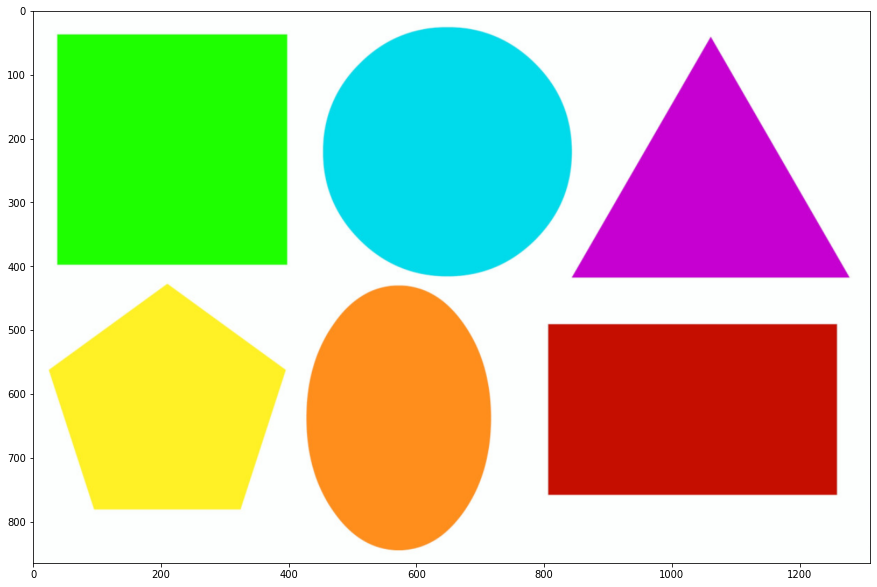

In [38]:
# load images
img_dir = r'data/'
img = cv2.imread(os.path.join(img_dir, 'findshape.png')) # read in B G R order

# convert to R G B
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show the image
plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()

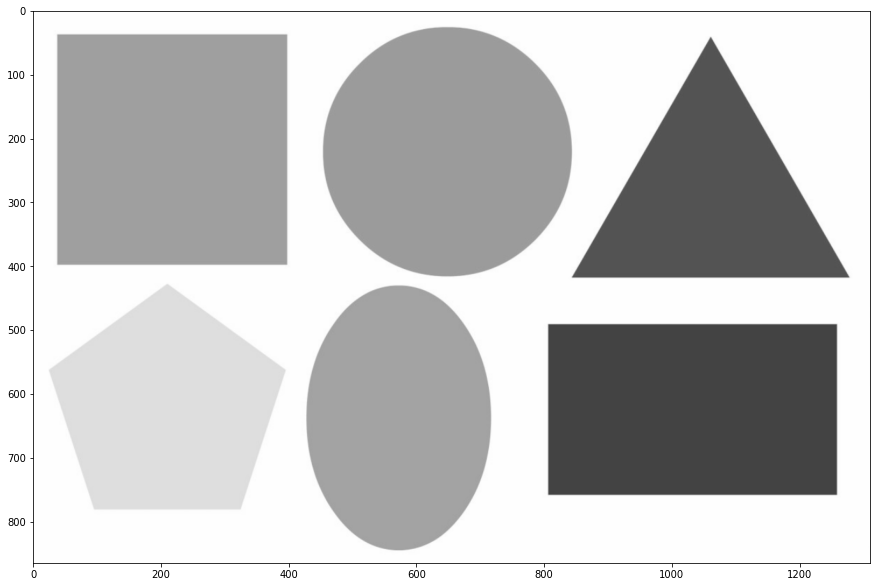

In [39]:
# Convert into GRAY scale for detecting the contours i.e. outline of each individual obejct
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gary_rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB) # TODO: why do we need to convert gray to RGB?

# Show the image
plt.figure(figsize=(15, 15))
plt.imshow(gary_rgb_img)
plt.show()

 

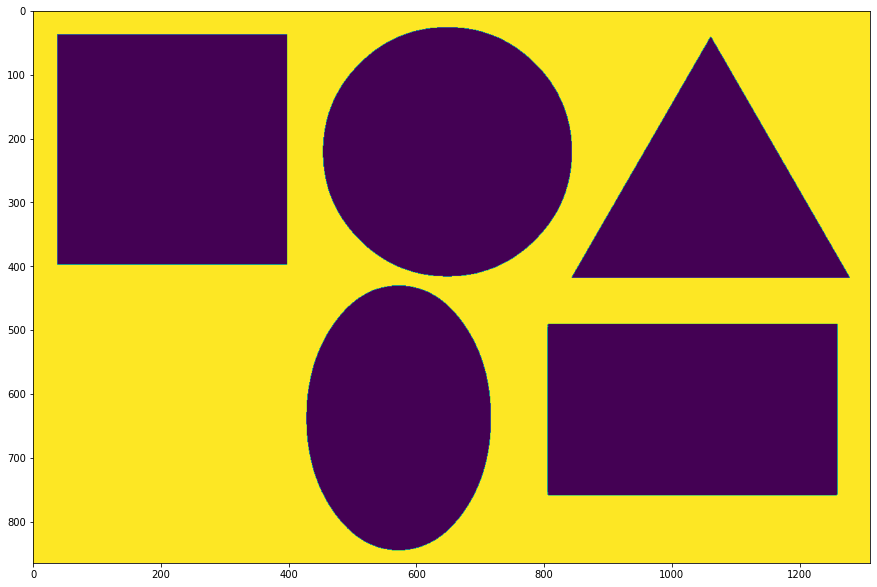

In [45]:
# remove the excessive noises using THRESHOLD
_, thresh_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)

# Show the image
plt.figure(figsize=(15, 15))
plt.imshow(thresh_img)
plt.show()


In [102]:
# find the total contours
conts = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# fine tune the contours return by cv2 using imutils(Because there are some contours openCV didn't catch)
conts = imutils.grab_contours(conts) # TODO: why do we need to findContours from openCV firstly? # TODO: it still catch 6 contours after threshold to 5 
len(conts)

6

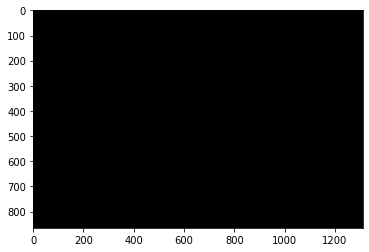

In [117]:
# highlight contours by creating an empty image with the same dimension with original image
cont_img = np.zeros(img.shape)
plt.imshow(cont_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


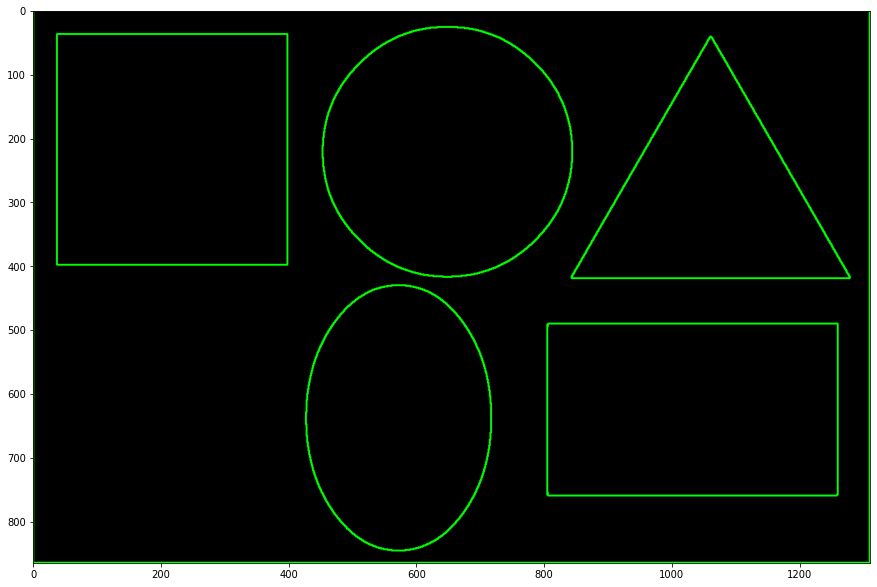

In [122]:
# Draw the contours in the empty image i.e. cont_img
cont_img = np.zeros(img.shape)
cont_img = cv2.drawContours(cont_img, conts, -1, (0, 255, 0), 2) # 2 is the thickness

# show the image only with the borders of contours
plt.figure(figsize=(15, 15))
plt.imshow(cont_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


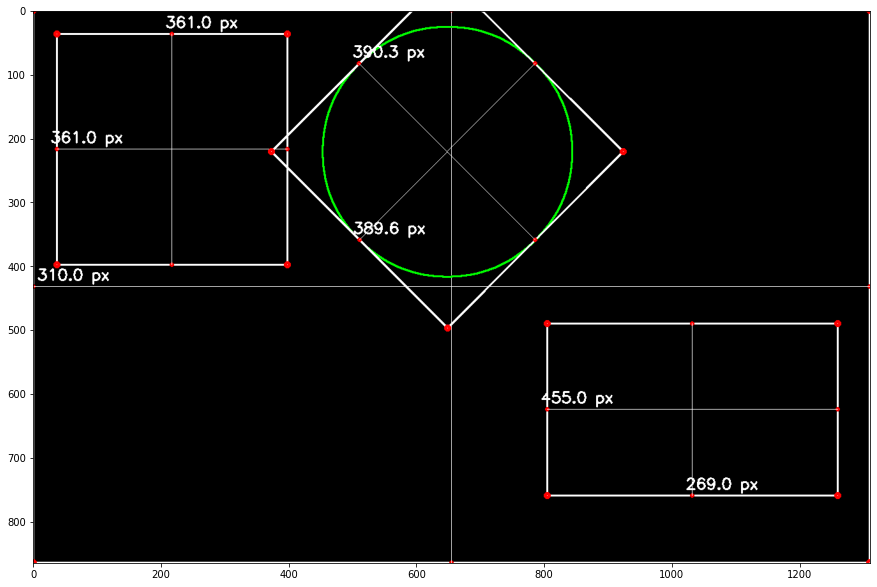

In [136]:
# **Extra: loop over all the contours to draw them
# each contour has its own coordinate with start point and end point from the left top to the righ bottom and an accurancy

# find the total contours
conts = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts) 

# Draw the contours in the empty image i.e. cont_img
cont_img = np.zeros(img.shape)

def midPoint(ptA, ptB):
    return (int((ptA[0] + ptB[0]) / 2), int((ptA[1] + ptB[1]) / 2))

for c in conts:
    # extract the bot points(left top, right bottom, accurancy)
    box = cv2.minAreaRect(c)

    # retrieve the coordinates of contours
    box = cv2.boxPoints(box)

    # convert box points into integer
    box = np.array(box, dtype='int')

    # not draw contours with small area
    if cv2.contourArea(c) < 100000:
        continue
    
    # draw the contours
    cv2.drawContours(cont_img, [c], -1, (0, 255, 0), 2)
    # make the surrounding box
    cv2.drawContours(cont_img, [box], -1, (255, 255, 255), 2)

    # set individual box
    for (x, y) in box:

        # draw a dot at point of box
        cv2.circle(cont_img, (x, y), 3, (255, 0, 0), 3)

        # identify the midpoint on each side of box then connect them
        # get top-bottom
        (tl, tr, br, bl) = box
        (midtX, midtY) = midPoint(tl, tr)
        (midbX, midbY) = midPoint(br, bl)

        # get left-right

        (midlX, midlY) = midPoint(tl, bl)
        (midrX, midrY) = midPoint(tr, br)

        cv2.circle(cont_img, (midlX, midlY), 2, (255, 0, 0), 2)
        cv2.circle(cont_img, (midbX, midbY), 2, (255, 0, 0), 2)

        cv2.circle(cont_img, (midtX, midtY), 2, (255, 0, 0), 2)
        cv2.circle(cont_img, (midrX, midrY), 2, (255, 0, 0), 2)

        # connect them
        cv2.line(cont_img, (midtX, midtY), (midbX, midbY), (255, 255, 255), 1)
        cv2.line(cont_img, (midlX, midlY), (midrX, midrY), (255, 255, 255), 1)

        # calculate the distance based on the midpoint
        dA = dist.euclidean((midtX, midtY), (midbX, midbY))
        cv2.putText(cont_img, '{:.1f} px'.format(dA), (midtX-10, midtY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

        dB = dist.euclidean((midlX, midlY), (midrX, midrY))
        cv2.putText(cont_img, '{:.1f} px'.format(dB), (midlX-10, midlY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# show the image
plt.figure(figsize=(15, 15))
plt.imshow(cont_img)
plt.show()